In [1]:
import numpy as np
from Trefft_tools import test_blocksdef
from domains import Waveguide

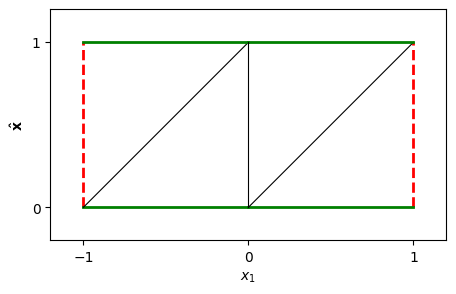

In [2]:
kappa_e = 8.
R = 1
H = 1.

Domain = Waveguide(R=R,H=H)

Domain.generate_mesh(h_max=H/1)
Domain.plot_mesh()

In [3]:
from Trefft_tools import  TrefftzSpace
Nth = 15
V = TrefftzSpace(Domain=Domain, DOF_per_element=Nth, kappa= {"Omega_i" : kappa_e, "Omega_e" : kappa_e}, th0=0.)
N_modes = 15 #Number of modes for the DtN map
# "UWVF" parameters


In [4]:
A, G = test_blocksdef(V, Edges=Domain.Edges, H=H, k=kappa_e, N_p=Nth, a = 1/2, b = 1/2, d_1=1/2 )

In [5]:
import matplotlib.pyplot as plt


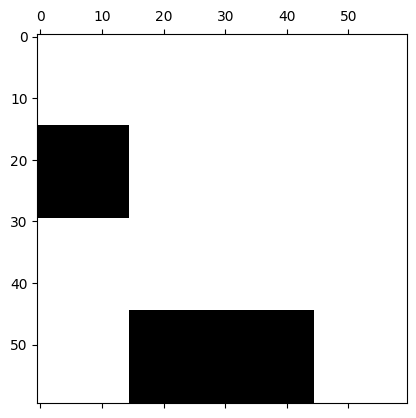

In [6]:
plt.spy(A)

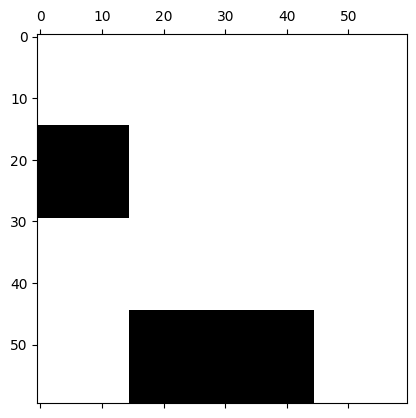

In [7]:
G_full = G.toarray()
plt.spy(G_full)

In [8]:
np.max(np.abs(A - G_full))

np.float64(7.105427357601002e-15)